<a href="https://colab.research.google.com/github/RitulMohan/Fast_ML/blob/main/hls4mlpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hls4ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.9/544.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.0/292.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyparser: filename=pyparser-1.0-py3-none-any.whl size=4914 sha256=38d821d739a040787a7bfefad3fa7840cc04d40586d5b0176899ecb84ad98539
  Stored in directory: /root/.cache/pip/wheels/25/87/78/ff95e8a747dc534fbd199fb3ea06d80935bc87e44567bbdb31
  Created wheel for parse: filename=parse-1.6.5-py3-none-any.whl size=18156 sha256=4a05563faaa

In [ ]:
import tensorflow as tf
import hls4ml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import json
%matplotlib inline

In [ ]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']
le = LabelEncoder()
y = le.fit_transform(y) #converts categorical to numerical classes
y = tf.keras.utils.to_categorical(y, 5) #5 is number of classes. converts numerical classes to one hot encoded classes. each row corresponds to a sample and each column corresponds to a class label.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1
def three_layer_model(Inputs, nclasses, l1Reg=0, name='model_1'):
    x = Dense(64, activation='relu', kernel_initializer='lecun_uniform',
              name='fc1_relu', kernel_regularizer=l1(l1Reg))(Inputs)
    x = Dense(32, activation='relu', kernel_initializer='lecun_uniform',
              name='fc2_relu', kernel_regularizer=l1(l1Reg))(x)
    x = Dense(32, activation='relu', kernel_initializer='lecun_uniform',
              name='fc3_relu', kernel_regularizer=l1(l1Reg))(x)
    predictions = Dense(nclasses, activation='softmax', kernel_initializer='lecun_uniform',
                        name='output_softmax', kernel_regularizer=l1(l1Reg))(x)
    model = Model(inputs=Inputs, outputs=predictions, name=name)
    return model

In [ ]:
train = False
if train:
    keras_model = three_layer_model(Input(shape=X_train_val.shape[1:], name='input_1'), y_train_val.shape[1], l1Reg=0.001)
    keras_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    keras_model.fit(X_train_val, y_train_val, batch_size=1024,
                    validation_split = 0.25, epochs = 30,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=5,
                                                                  restore_best_weights=True)])
    keras_model.save('keras_3layer.h5',save_format='h5', overwrite=True)
    keras_model.summary()
    y_keras = keras_model.predict(X_test)
else:
    keras_model = tf.keras.models.load_model('keras_3layer.h5')
    keras_model.summary()
    y_keras = keras_model.predict(X_test)

Epoch 1/30
487/487 [==============================] - 7s 8ms/step - loss: 1.3358 - acc: 0.6795 - val_loss: 1.0901 - val_acc: 0.7240
Epoch 2/30
487/487 [==============================] - 3s 6ms/step - loss: 1.0167 - acc: 0.7293 - val_loss: 0.9702 - val_acc: 0.7331
Epoch 3/30
487/487 [==============================] - 5s 10ms/step - loss: 0.9377 - acc: 0.7360 - val_loss: 0.9187 - val_acc: 0.7374
Epoch 4/30
487/487 [==============================] - 5s 10ms/step - loss: 0.8999 - acc: 0.7397 - val_loss: 0.8913 - val_acc: 0.7414
Epoch 5/30
487/487 [==============================] - 6s 12ms/step - loss: 0.8761 - acc: 0.7421 - val_loss: 0.8755 - val_acc: 0.7410
Epoch 6/30
487/487 [==============================] - 7s 14ms/step - loss: 0.8614 - acc: 0.7437 - val_loss: 0.8607 - val_acc: 0.7423
Epoch 7/30
487/487 [==============================] - 3s 6ms/step - loss: 0.8497 - acc: 0.7449 - val_loss: 0.8494 - val_acc: 0.7436
Epoch 8/30
487/487 [==============================] - 3s 6ms/step - loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
output_dir = '/content/drive/MyDrive/hls4ml_project'
# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
hls_cfg = hls4ml.utils.config_from_keras_model(keras_model, granularity='name')
hls_model = hls4ml.converters.convert_from_keras_model(keras_model, output_dir=output_dir, hls_config=hls_cfg)

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1_relu, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: fc2_relu, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: fc3_relu, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output_softmax, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1_relu, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: fc2_relu, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: fc3_relu, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output_softmax, layer type: Dense, input shapes: [[None, 32]], output s

In [ ]:
hls_model.compile()

Writing HLS project
Done


In [ ]:
# Convert X_test to a contiguous memory layout
X_test_contiguous = np.ascontiguousarray(X_test)

# Use the converted array for prediction
y_hls4ml = hls_model.predict(X_test_contiguous)
# By using numpy.ascontiguousarray, you ensure that the memory layout of X_test is compatible with HLS4ML's requirements

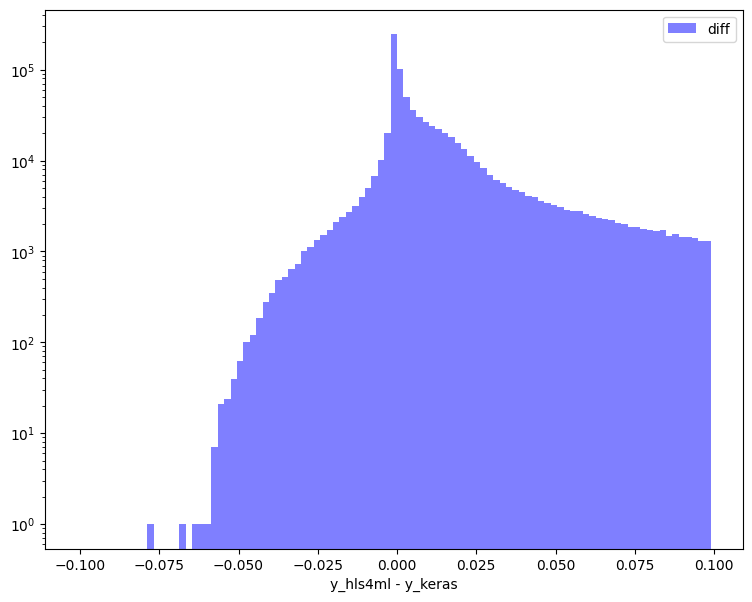

In [ ]:
plt.figure(figsize=(9, 7))
h, b = np.histogram((y_hls4ml - y_keras).flatten(), bins=np.linspace(-0.1,0.1,100))
plt.bar(b[:-1], h, width=b[1]-b[0], color='b', alpha=0.5, label='diff')
plt.legend()
plt.semilogy()
plt.xlabel('y_hls4ml - y_keras')
plt.savefig('residual.png')

In [ ]:
!pip install plotting

Accuracy keras:  0.7510903614457831
Accuracy hls4ml: 0.7513253012048193


AttributeError: ignored

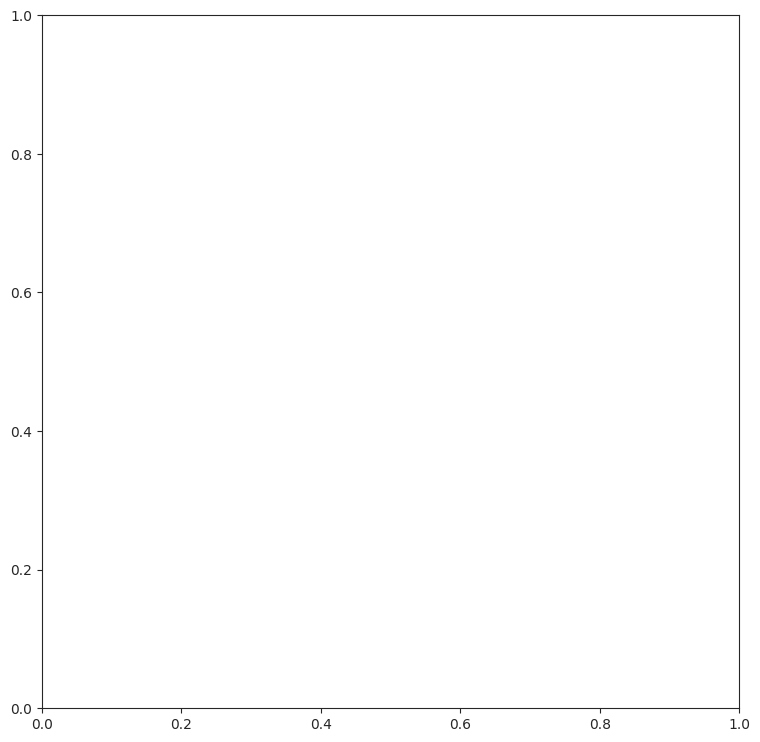

In [ ]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

print("Accuracy keras:  {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
print("Accuracy hls4ml: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls4ml, axis=1))))

#ax, = plt.figure(figsize=(9, 9))
fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, le.classes_)
plt.gca().set_prop_cycle(None) # reset the colors
_ = plotting.makeRoc(y_test, y_hls4ml, le.classes_, linestyle='--')

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], ls='-'),
         Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend
leg = Legend(ax, lines, labels=['keras', 'hls4ml'],
            loc='lower right', frameon=False)
ax.add_artist(leg)